In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\utkun\OneDrive\Desktop\Data Analysis Udemy\BAJFINANCE.csv")

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [4]:
df.set_index('Date',inplace=True)

<Axes: xlabel='Date'>

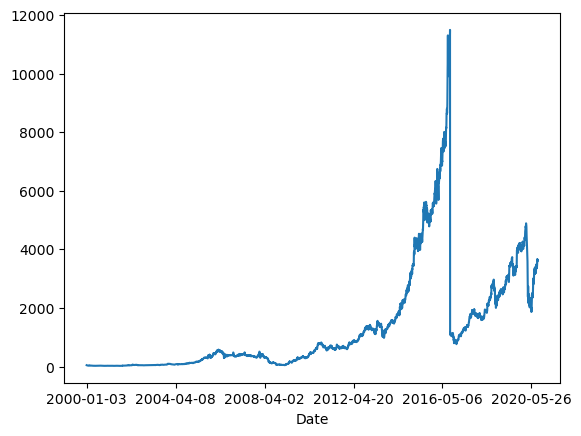

In [5]:
df['VWAP'].plot()

In [6]:
df.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [7]:
df['Trades'].isnull().sum()

2779

In [8]:
df['Trades'].mean()

47105.84373635967

In [9]:
df['Trades'].fillna(df['Trades'].mean(),inplace=True)

In [10]:
df['Deliverable Volume'].fillna(df['Deliverable Volume'].mean(),inplace=True)

In [11]:
df['%Deliverble'].fillna(df['%Deliverble'].mean(),inplace=True)

In [12]:
df.shape

(5070, 14)

In [13]:
df.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [14]:
data = df.copy()

In [15]:
lag_features = ['High','Low','Volume','Turnover','Trades']
window1 = 3
window2 = 7

In [16]:
for feature in lag_features:
    data[feature + 'rolling_mean3'] = data[feature].rolling(window=window1).mean()
    data[feature + 'rolling_mean7'] = data[feature].rolling(window=window2).mean()

In [17]:
for feature in lag_features:
    data[feature + 'rolling_std3'] = data[feature].rolling(window=window1).std()
    data[feature + 'rolling_std7'] = data[feature].rolling(window=window2).std()

In [18]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean3', 'Highrolling_mean7',
       'Lowrolling_mean3', 'Lowrolling_mean7', 'Volumerolling_mean3',
       'Volumerolling_mean7', 'Turnoverrolling_mean3', 'Turnoverrolling_mean7',
       'Tradesrolling_mean3', 'Tradesrolling_mean7', 'Highrolling_std3',
       'Highrolling_std7', 'Lowrolling_std3', 'Lowrolling_std7',
       'Volumerolling_std3', 'Volumerolling_std7', 'Turnoverrolling_std3',
       'Turnoverrolling_std7', 'Tradesrolling_std3', 'Tradesrolling_std7'],
      dtype='object')

In [19]:
data.head(4)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std3,Highrolling_std7,Lowrolling_std3,Lowrolling_std7,Volumerolling_std3,Volumerolling_std7,Turnoverrolling_std3,Turnoverrolling_std7,Tradesrolling_std3,Tradesrolling_std7
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,...,2.911615,NaN,1.656301,NaN,2074.447718,NaN,1.117075e+10,NaN,0.0,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,...,3.817504,NaN,2.909181,NaN,1352.774926,NaN,5.999789e+09,NaN,0.0,NaN


In [20]:
data.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                   0
Deliverable Volume       0
%Deliverble              0
Highrolling_mean3        2
Highrolling_mean7        6
Lowrolling_mean3         2
Lowrolling_mean7         6
Volumerolling_mean3      2
Volumerolling_mean7      6
Turnoverrolling_mean3    2
Turnoverrolling_mean7    6
Tradesrolling_mean3      2
Tradesrolling_mean7      6
Highrolling_std3         2
Highrolling_std7         6
Lowrolling_std3          2
Lowrolling_std7          6
Volumerolling_std3       2
Volumerolling_std7       6
Turnoverrolling_std3     2
Turnoverrolling_std7     6
Tradesrolling_std3       2
Tradesrolling_std7       6
dtype: int64

In [32]:
data.dropna(inplace=True)

In [33]:
data.shape

(5064, 34)

In [34]:
ind_features = ['Highrolling_mean3', 'Highrolling_mean7',
       'Lowrolling_mean3', 'Lowrolling_mean7', 'Volumerolling_mean3',
       'Volumerolling_mean7', 'Turnoverrolling_mean3', 'Turnoverrolling_mean7',
       'Tradesrolling_mean3', 'Tradesrolling_mean7', 'Highrolling_std3',
       'Highrolling_std7', 'Lowrolling_std3', 'Lowrolling_std7',
       'Volumerolling_std3', 'Volumerolling_std7', 'Turnoverrolling_std3',
       'Turnoverrolling_std7', 'Tradesrolling_std3', 'Tradesrolling_std7']

In [43]:
training_data = data[0:4000]
test_data = data[4001:]

In [35]:
training_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

In [36]:
!pip install pmdarima

In [44]:
from pmdarima import auto_arima

In [45]:
model = auto_arima(y=training_data['VWAP'],exogenous = training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=2.71 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=40576.024, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=40099.044, Time=0.18 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=39708.118, Time=0.26 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=39557.707, Time=0.34 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=39469.024, Time=0.45 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=39368.954, Time=0.44 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=4.68 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=2.76 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=39370.940, Time=0.56 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 13.027 seconds


In [46]:
model.fit(y = training_data['VWAP'],x = training_data[ind_features])

ARIMA(order=(5, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [47]:
forecast = model.predict(n_periods=len(test_data), x=test_data[ind_features])

C:\Users\utkun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [48]:
test_data['forecast_ARIMA'] = forecast

<Axes: xlabel='Date'>

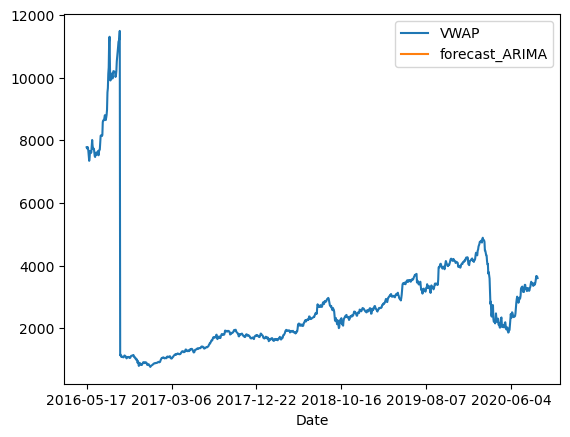

In [49]:
test_data[['VWAP','forecast_ARIMA']].plot()